#Applying baseline and then cropping if necessary

In [ ]:
baseline_tmin, baseline_tmax = None, 0
baseline = (baseline_tmin, baseline_tmax)

In [ ]:
epochs_str_all_par=mne.read_epochs('epochs_str_all_par.fif')
epochs_str_all_par_base=epochs_str_all_par.copy().apply_baseline(baseline)
# epochs_str_all_par_base_cropped=epochs_str_all_par_base.copy().crop(1.367, 3.320)
# epochs_str_all_par_base_cropped.save('epochs_str_all_par_base_cropped.fif', overwrite=True);


epochs_left_all_par=mne.read_epochs('epochs_left_all_par.fif')
epochs_left_all_par_base=epochs_left_all_par.copy().apply_baseline(baseline)
# epochs_left_all_par_base_cropped=epochs_left_all_par_base.copy().crop(1.367, 3.320)
# epochs_left_all_par_base_cropped.save('epochs_left_all_par_base_cropped.fif', overwrite=True);

epochs_right_all_par=mne.read_epochs('epochs_right_all_par.fif')
epochs_right_all_par_base=epochs_right_all_par.copy().apply_baseline(baseline)
# epochs_right_all_par_base_cropped=epochs_right_all_par_base.copy().crop(1.367, 3.320)
# epochs_right_all_par_base_cropped.save('epochs_right_all_par_base_cropped.fif', overwrite=True);


Reading /content/gdrive/MyDrive/DrivingData/EEGData/Epochs_combined_Par/epochs_str_all_par.fif ...


<ipython-input-7-c4da975dd36e>:1: RuntimeWarning: This filename (epochs_str_all_par.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_str_all_par=mne.read_epochs('epochs_str_all_par.fif')


    Found the data of interest:
        t =    -199.22 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1656 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /content/gdrive/MyDrive/DrivingData/EEGData/Epochs_combined_Par/epochs_left_all_par.fif ...


<ipython-input-7-c4da975dd36e>:7: RuntimeWarning: This filename (epochs_left_all_par.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_left_all_par=mne.read_epochs('epochs_left_all_par.fif')


    Found the data of interest:
        t =    -199.22 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
792 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading /content/gdrive/MyDrive/DrivingData/EEGData/Epochs_combined_Par/epochs_right_all_par.fif ...


<ipython-input-7-c4da975dd36e>:12: RuntimeWarning: This filename (epochs_right_all_par.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_right_all_par=mne.read_epochs('epochs_right_all_par.fif')


    Found the data of interest:
        t =    -199.22 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
864 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


#PSD

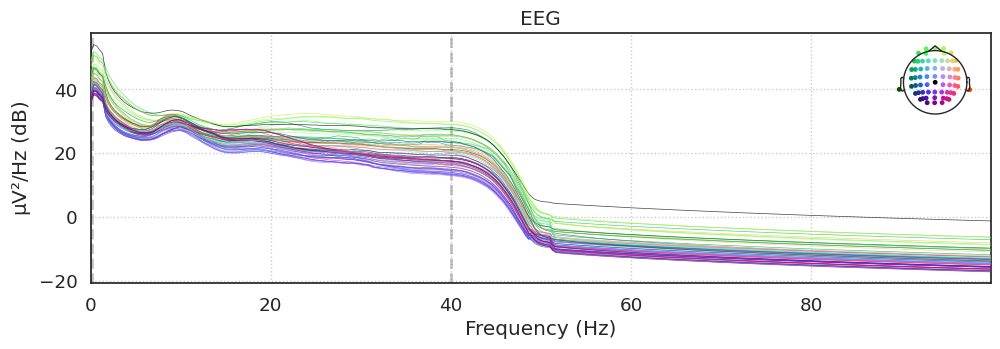

In [ ]:
epochs_left_all_par_base.crop(0,3).plot_psd(fmax=100);

#Welch for averaged signals

In [ ]:
from numpy.ma.core import get_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
sns.set(font_scale=1.2)
sf = 512
#number of smples during the epoch
sample=1537
time = np.arange(sample) / sf
## Choosing the frrequency band
low, high = 0.5, 4

In [ ]:
event_num=792
sum_freqs=0
sum_psd=0
win = 4 * sf
nperseg = 1537  # Number of data points in each segment
noverlap = 512
window = 'hann'
data_af8_l = epochs_left_all_par_base_cropped.copy().average().get_data(  picks=['AF8'])
data_af8_l=data_af8_l[0,:]
freqs_l_af8, psd_l_af8 = signal.welch(data_af8_l, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)

data_af7_l = epochs_left_all_par_base_cropped.copy().average().get_data(  picks=['AF7'])
data_af7_l=data_af7_l[0,:]
freqs_l_af7, psd_l_af7 = signal.welch(data_af7_l, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)

data_af8_r = epochs_right_all_par_base_cropped.copy().average().get_data(  picks=['AF8'])
data_af8_r=data_af8_r[0,:]
freqs_r_af8, psd_r_af8 = signal.welch(data_af8_r, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)

data_af7_r = epochs_right_all_par_base_cropped.copy().average().get_data(  picks=['AF7'])
data_af7_r=data_af7_r[0,:]
freqs_r_af7, psd_r_af7 = signal.welch(data_af7_r, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)



data_af7_s = epochs_str_all_par_base_cropped.copy().average().get_data(  picks=['AF7'])
data_af7_s=data_af7_s[0,:]
freqs_s_af7, psd_s_af7 = signal.welch(data_af7_s, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)

data_af8_s = epochs_str_all_par_base_cropped.copy().average().get_data(  picks=['AF8'])
data_af8_s=data_af8_s[0,:]
freqs_s_af8, psd_s_af8 = signal.welch(data_af8_s, fs=sf, nperseg=nperseg, noverlap=noverlap, window=window)





NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


#General parameters for all types of epochs

In [ ]:
from numpy.ma.core import get_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
sns.set(font_scale=1.2)
sf = 512
#number of smples during the epoch
sample=2151
time = np.arange(sample) / sf
## Choosing the frrequency band
low, high = 0.5, 4
# Find intersecting values in frequency vector
#idx_delta = np.logical_and(freqs >= low, freqs <= high)
#idx_theta = np.logical_and(freqs >= 4, freqs <= 8)
#idx_alpha = np.logical_and(freqs >= 8, freqs <= 12)


#PDS for all left epochs

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 2048 is greater than input length  = 1537, using nperseg = 1537
  warnings.warn('nperseg = {0:d} is greater than input length '


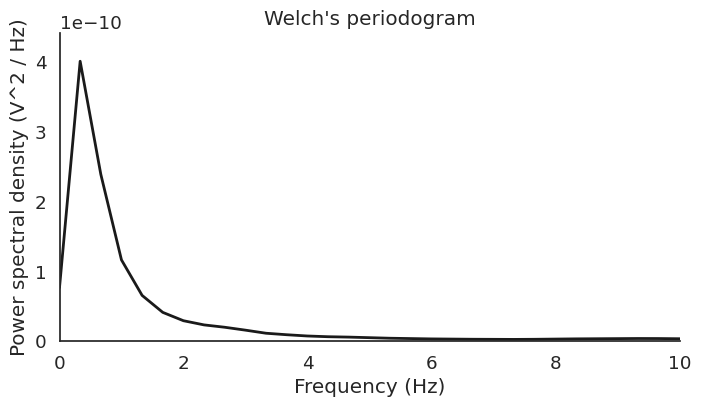

In [ ]:

#data = epochs_left_all_par_base.get_data(  picks=['F7'])
event_num=792
sum_freqs=0
sum_psd=0
win = 4 * sf
nperseg = 1537  # Number of data points in each segment
noverlap = 512
window = 'hann'

for i in range (0, event_num):
  data = epochs_left_all_par_base_cropped.get_data(  picks=['AF8'])
  data=data[i,0,:]
  freqs, psd = signal.welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap, window=window)
  sum_freqs=sum_freqs+freqs
  sum_psd=sum_psd+psd
meanl_freqs=sum_freqs/event_num
meanl_psd=sum_psd/event_num

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot (meanl_freqs,meanl_psd , color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, meanl_psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 10])
sns.despine()



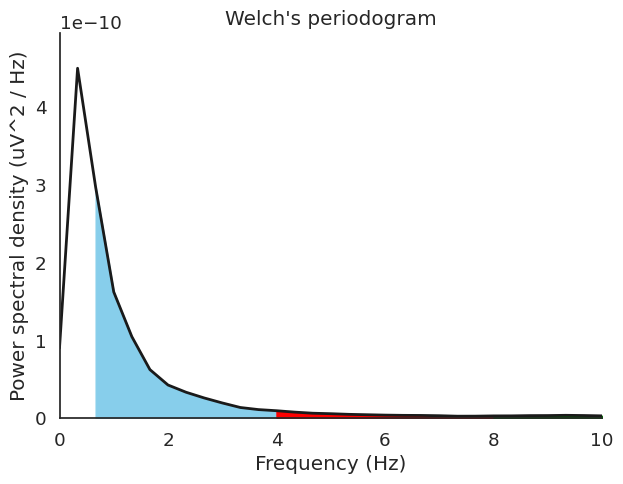

In [ ]:
idx_delta = np.logical_and(freqs >= low, freqs <= high)
idx_theta = np.logical_and(freqs >= 4, freqs <= 8)
idx_alpha = np.logical_and(freqs >= 8, freqs <= 12)
# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 5))
plt.plot(meanl_freqs, meanl_psd, lw=2, color='k')
plt.fill_between(meanl_freqs, meanl_psd, where=idx_delta, color='skyblue')
plt.fill_between(meanl_freqs, meanl_psd, where=idx_theta, color='red')
plt.fill_between(meanl_freqs, meanl_psd, where=idx_alpha, color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, meanl_psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

#Plots

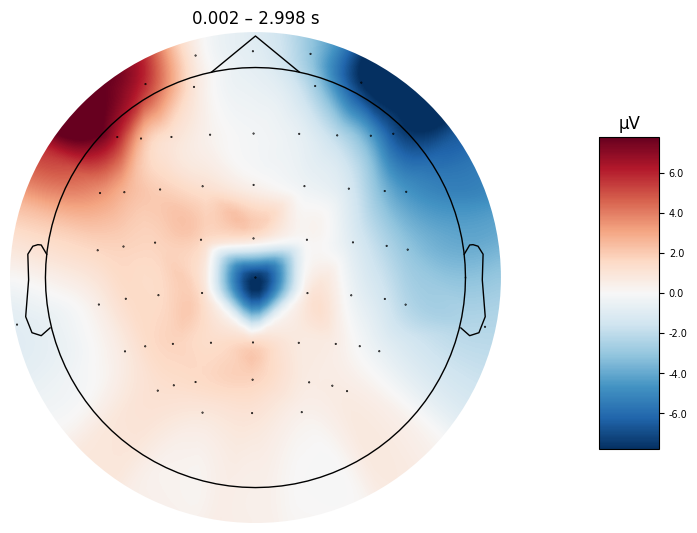

In [ ]:
import mne
mne.set_log_level('error')  # reduce extraneous MNE output
import matplotlib.pyplot as plt
import numpy as np
import glob
mne.viz.plot_evoked_topomap(epochs_left_all_par_base.average(),
                            times=1.5, average=3,
                            #show_names=True,
                            contours=False,size=4);

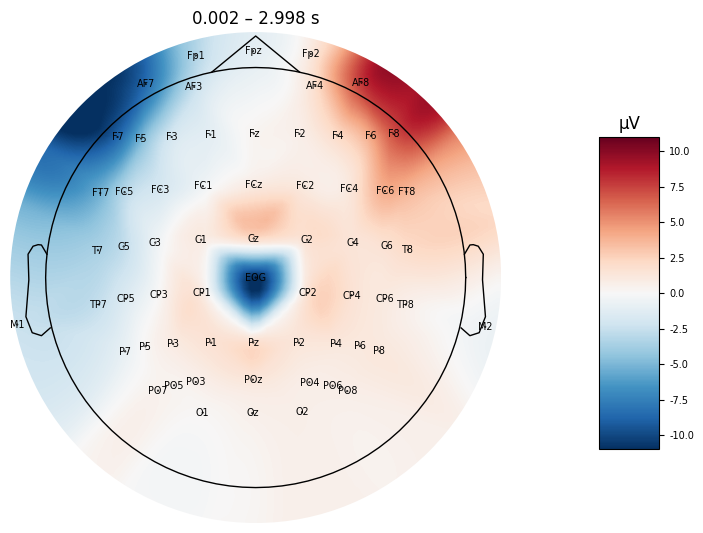

In [ ]:
mne.viz.plot_evoked_topomap(epochs_right_all_par_base.average(),
                            1.5, average=3,
                            show_names=True,
                            contours=False,size=4);

#Cropping the epochs for plots

In [ ]:


epochs_str_all_par_base_cropped=epochs_str_all_par_base.copy().crop(0, 3)
# epochs_str_all_par_base_cropped.save('epochs_str_all_par_base_cropped.fif', overwrite=True);


epochs_left_all_par_base_cropped=epochs_left_all_par_base.copy().crop(0, 3)
# epochs_left_all_par_base_cropped.save('epochs_left_all_par_base_cropped.fif', overwrite=True);

epochs_right_all_par_base_cropped=epochs_right_all_par_base.copy().crop(0,3)
# epochs_right_all_par_base_cropped.save('epochs_right_all_par_base_cropped.fif', overwrite=True);


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


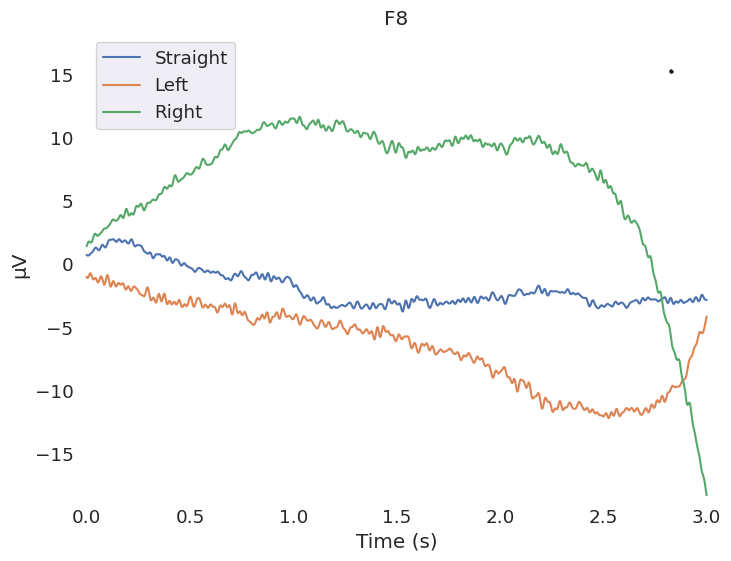

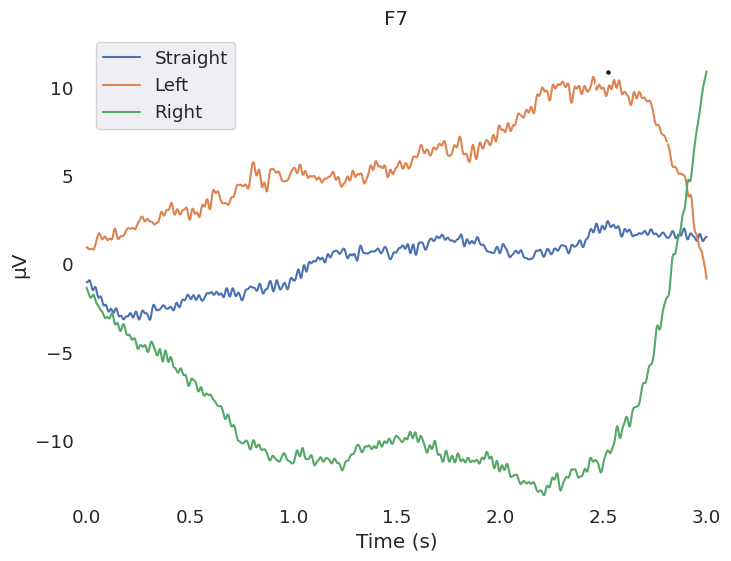

ValueError: ignored

In [ ]:
#evokeds= {'Straight':epochs_str_all_par_base.average(), 'Left':epochs_left_all_par_base.average(), 'Right':epochs_right_all_par_base.average() }
evokeds= {'Straight':epochs_str_all_par_base_cropped.average(), 'Left':epochs_left_all_par_base_cropped.average(), 'Right':epochs_right_all_par_base_cropped.average() }

mne.viz.plot_compare_evokeds(evokeds, picks='F8' )
mne.viz.plot_compare_evokeds(evokeds, picks='F7')

mne.viz.plot_compare_evokeds(evokeds, picks='AF8')
mne.viz.plot_compare_evokeds(evokeds, picks='AF7')


<ipython-input-13-3a339c071e23>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds, picks='EOG')


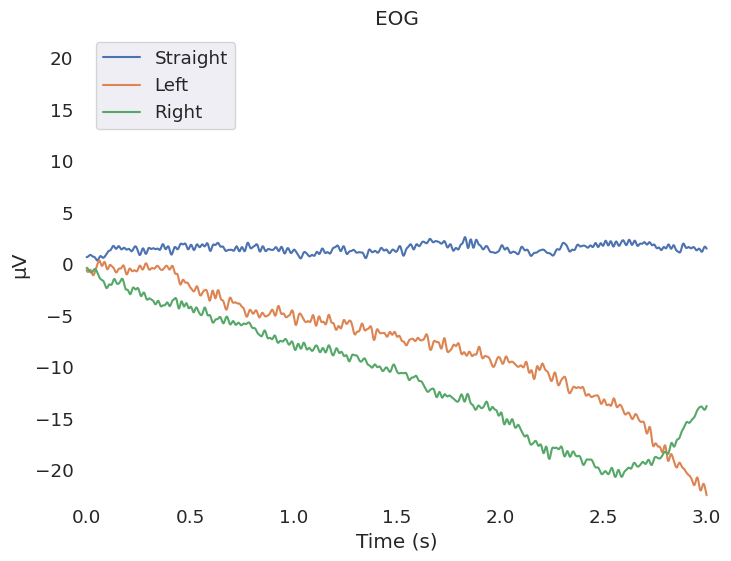

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(evokeds, picks='EOG')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


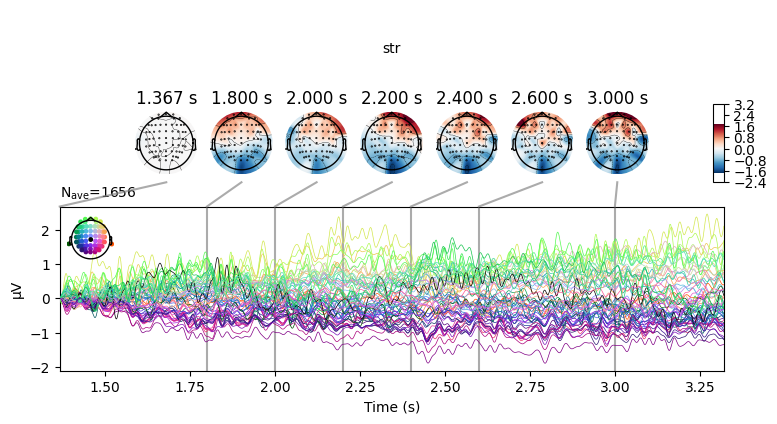

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


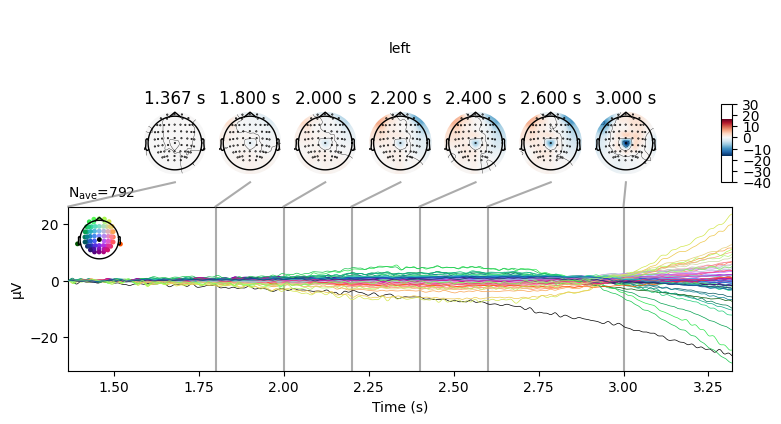

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


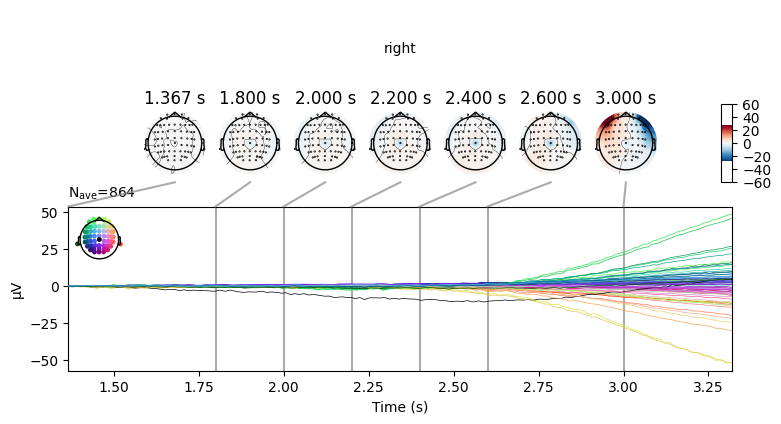

In [ ]:
newtimes = [ 1.367 , 1.8 , 2,  2.2 ,2.4 ,  2.6, 3 ]
epochs_str_all_par_cropped_base.average().plot_joint(times=newtimes, title='str');
epochs_left_all_par_cropped_base.average().plot_joint(times=newtimes, title='left');
epochs_right_all_par_cropped_base.average().plot_joint(times=newtimes, title='right');
#epochs_all_all_par_cropped_base.average().plot_joint(times=newtimes, title='all');

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


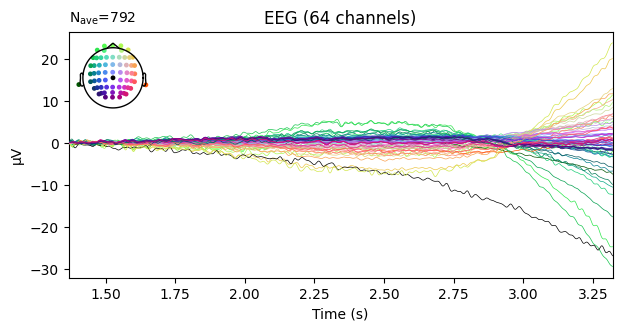

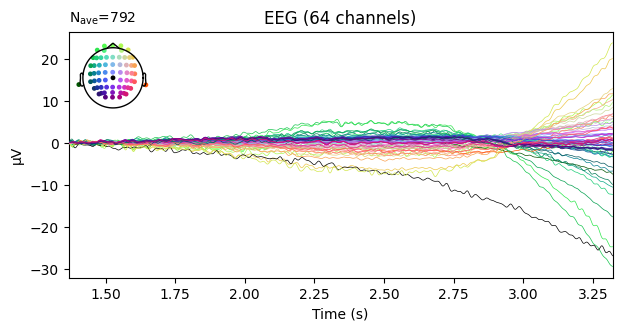

In [ ]:
epochs_left_all_par_cropped_base.average().plot()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


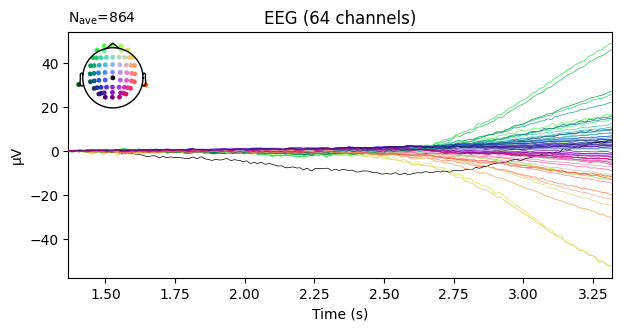

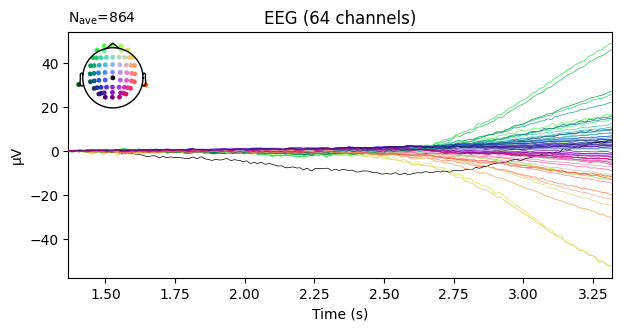

In [ ]:
epochs_right_all_par_cropped_base.average().plot()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


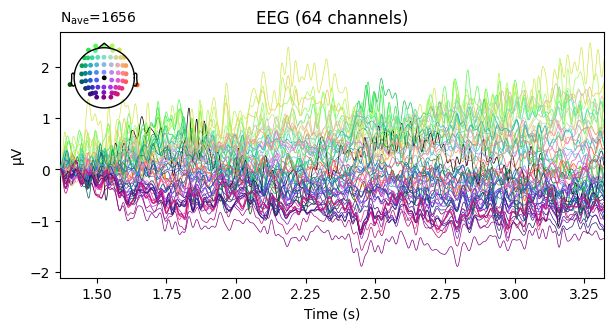

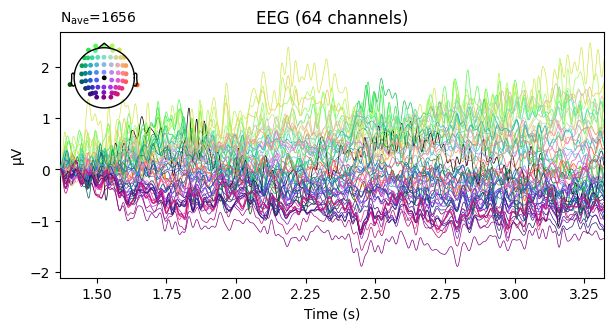

In [ ]:
epochs_str_all_par_cropped_base.average().plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


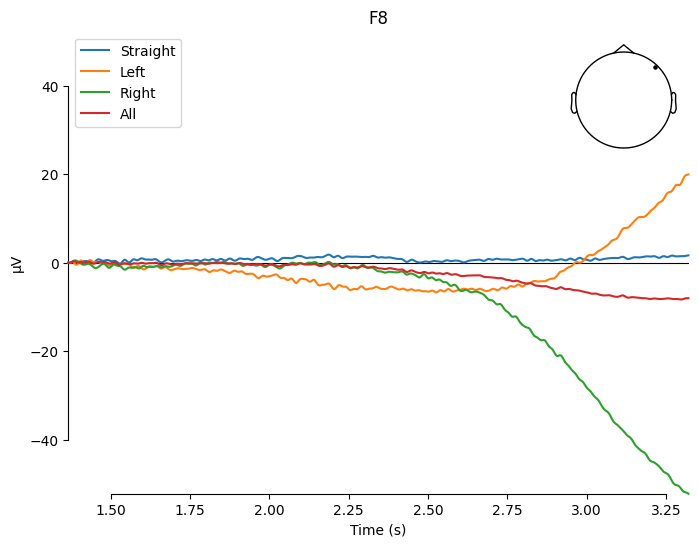

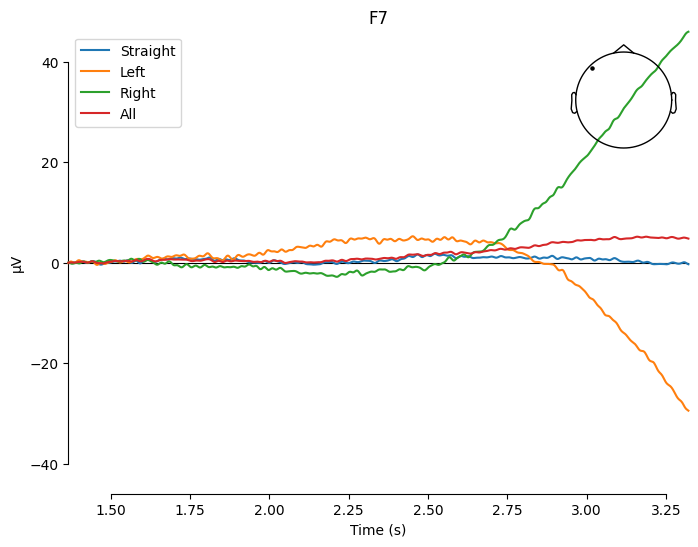

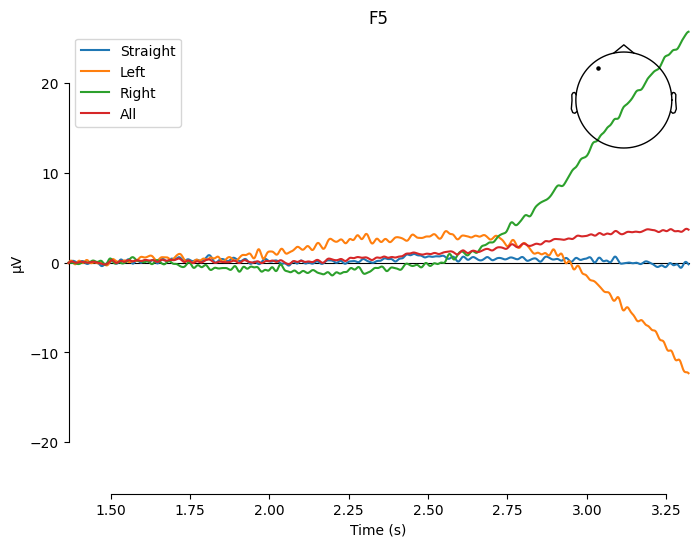

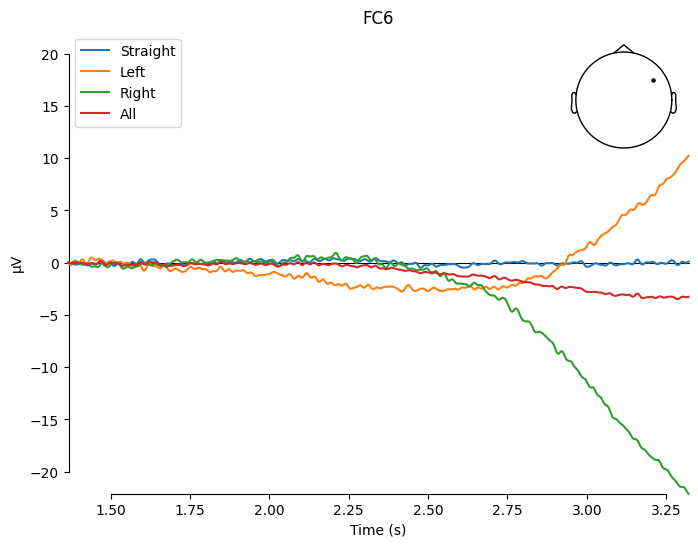

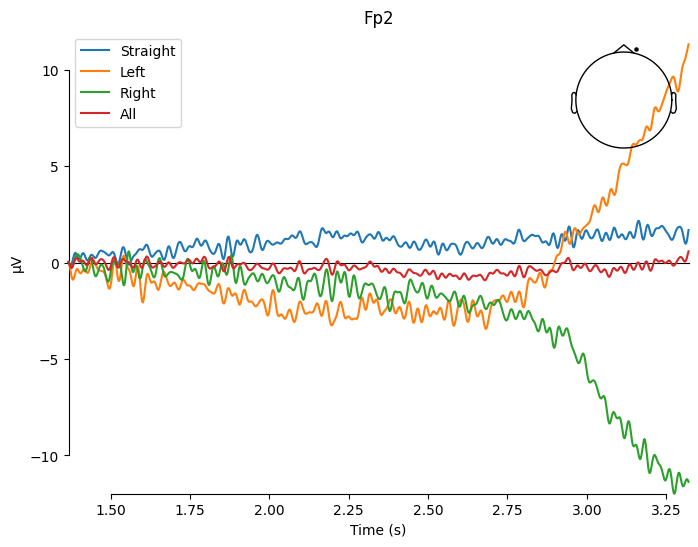

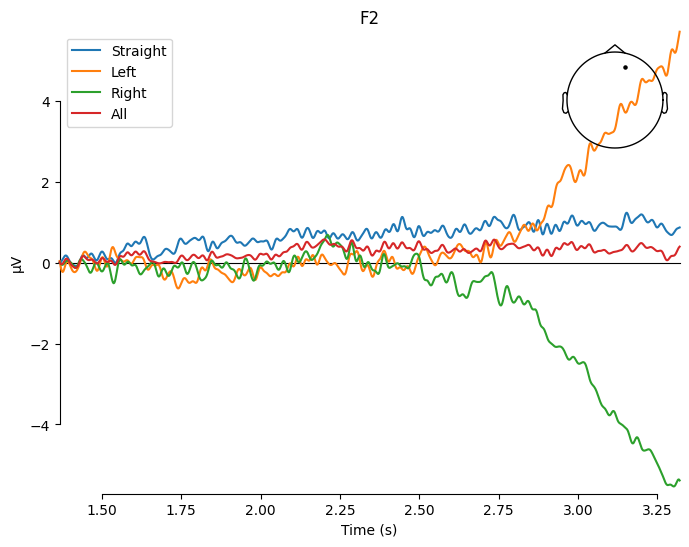

[<Figure size 800x600 with 2 Axes>]

In [ ]:
evokeds= {'Straight':epochs_str_all_par_cropped_base.average(), 'Left':epochs_left_all_par_cropped_base.average(), 'Right':epochs_right_all_par_cropped_base.average(), 'All':epochs_all_all_par_cropped_base.average() }
mne.viz.plot_compare_evokeds(evokeds, picks='F8')
mne.viz.plot_compare_evokeds(evokeds, picks='F7')
mne.viz.plot_compare_evokeds(evokeds, picks='F5')
mne.viz.plot_compare_evokeds(evokeds, picks='FC6')
mne.viz.plot_compare_evokeds(evokeds, picks='Fp2')
mne.viz.plot_compare_evokeds(evokeds, picks='F2')


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


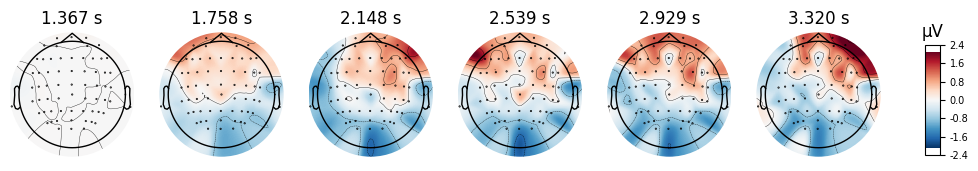

In [ ]:
fig_str = epochs_str_all_par_cropped_base.average().plot_topomap(times=np.linspace(1.367, 3.32, 6))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


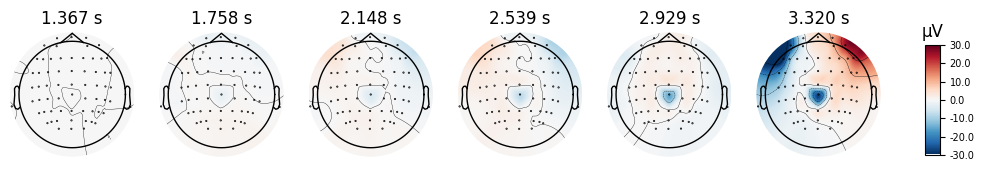

In [ ]:
fig_left=epochs_left_all_par_cropped_base.average().plot_topomap(times=np.linspace(1.367, 3.32, 6))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


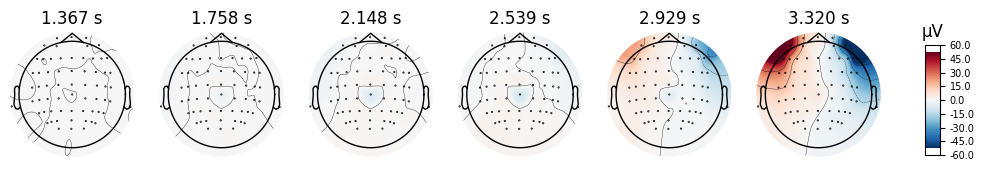

In [ ]:
fig_right=epochs_right_all_par_cropped_base.average().plot_topomap(times=np.linspace(1.367, 3.32, 6))

In [ ]:
fig_left=epochs_left_all_par_cropped_base.average().plot_topomap(times=np.linspace(1.367, 3.32, 6))